# Run Experiments

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import numpy as np
from ema_workbench import TimeSeriesOutcome, perform_experiments, RealParameter, ema_logging
from ema_workbench.analysis import lines
from ema_workbench.connectors.vensim import VensimModel, LookupUncertainty
from ema_workbench.connectors.vensimDLLwrapper import get_varnames

C:\Users\marno\AppData\Roaming\Python\Python310\site-packages\ema_workbench\connectors\__init__.py:29: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Users\marno\AppData\Roaming\Python\Python310\site-packages\ema_workbench\connectors\__init__.py:34: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)


In [5]:
wd = r'./models'

In [7]:
ema_logging.log_to_stderr(ema_logging.INFO)
model = VensimModel("roadspaceModel", wd=wd, model_file="model.vpmx")
model.uncertainties = [
    RealParameter("OCCUPANCY RATE", 1.1, 1.3)]#,
                      # RealParameter("RELATIVE CHANGE IN PARKING SPOTS PER HOME CONSTRUCTED",-0.5, 0.0)]
model.outcomes = [TimeSeriesOutcome("total car share", variable_name="Total Car Share"),
                 TimeSeriesOutcome("total cycling share", variable_name="Total Cycling Share")]

In [8]:
# run policy with old cases
experiments, outcomes = perform_experiments(model, 100)

[MainProcess/INFO] performing 100 scenarios * 1 policies * 1 model(s) = 100 experiments
100%|████████████████████████████████████████| 100/100 [00:08<00:00, 12.43it/s]
[MainProcess/INFO] experiments finished


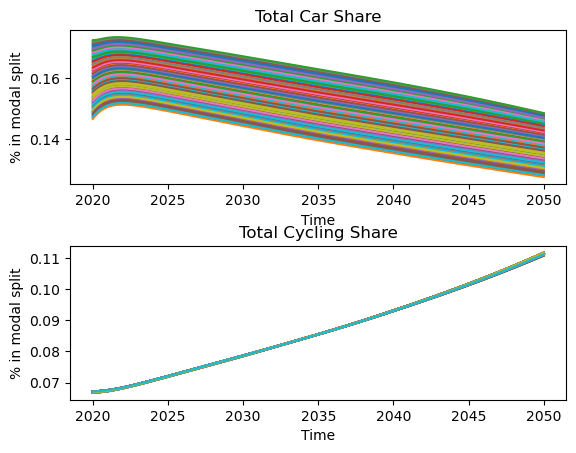

In [9]:
fig, axes = lines(experiments, outcomes, ["total car share", "total cycling share"], 
      ylabels={"total car share": "% in modal split",
              "total cycling share": "% in modal split"},
     titles={"total car share": "Total Car Share",
            "total cycling share": "Total Cycling Share"})
plt.ticklabel_format(useOffset=False)
plt.show()

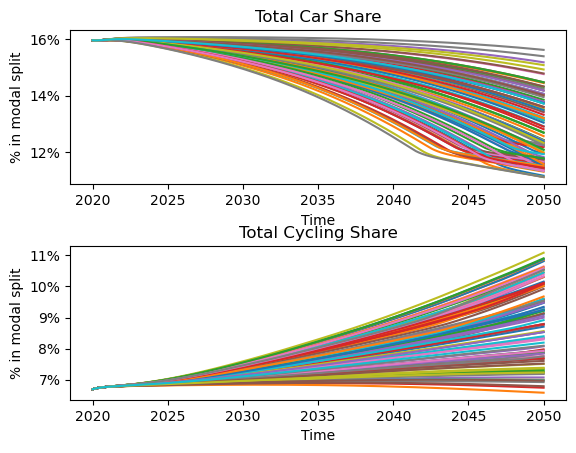

<Figure size 640x480 with 0 Axes>

In [30]:
for param in axes.keys():
    # current_min, current_max = axes[param].get_ylim()
    # new_min, new_max = 0.8*current_min, 1.1*current_max
    # axes[param].set_ylim((new_min, new_max))
    axes[param].yaxis.set_major_formatter(PercentFormatter(xmax=1, decimals=0))
plt.tight_layout()
fig  

In [31]:
fname = " and ".join(axes.keys())
fig.savefig(f"./results/{fname}.png")